In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import json
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity, euclidean_distances

In [3]:
def LoadData():
    return pd.read_csv("/content/drive/MyDrive/NLP Basics/tmdb_5000_movies.csv")

In [32]:
Dataset=LoadData()
Dataset.tail()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
4798,220000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",NaN,9367,"[{""id"": 5616, ""name"": ""united states\u2013mexi...",es,El Mariachi,El Mariachi just wants to play his guitar and ...,14.269792,"[{""name"": ""Columbia Pictures"", ""id"": 5}]","[{""iso_3166_1"": ""MX"", ""name"": ""Mexico""}, {""iso...",1992-09-04,2040920,81.0,"[{""iso_639_1"": ""es"", ""name"": ""Espa\u00f1ol""}]",Released,"He didn't come looking for trouble, but troubl...",El Mariachi,6.6,238
4799,9000,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 10749, ""...",NaN,72766,[],en,Newlyweds,A newlywed couple's honeymoon is upended by th...,0.642552,[],[],2011-12-26,0,85.0,[],Released,A newlywed couple's honeymoon is upended by th...,Newlyweds,5.9,5
4800,0,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 18, ""nam...",http://www.hallmarkchannel.com/signedsealeddel...,231617,"[{""id"": 248, ""name"": ""date""}, {""id"": 699, ""nam...",en,"Signed, Sealed, Delivered","""Signed, Sealed, Delivered"" introduces a dedic...",1.444476,"[{""name"": ""Front Street Pictures"", ""id"": 3958}...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2013-10-13,0,120.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,NaN,"Signed, Sealed, Delivered",7.0,6
4801,0,[],http://shanghaicalling.com/,126186,[],en,Shanghai Calling,When ambitious New York attorney Sam is sent t...,0.857008,[],"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-05-03,0,98.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,A New Yorker in Shanghai,Shanghai Calling,5.7,7
4802,0,"[{""id"": 99, ""name"": ""Documentary""}]",NaN,25975,"[{""id"": 1523, ""name"": ""obsession""}, {""id"": 224...",en,My Date with Drew,Ever since the second grade when he first saw ...,1.929883,"[{""name"": ""rusty bear entertainment"", ""id"": 87...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2005-08-05,0,90.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,NaN,My Date with Drew,6.3,16


In [6]:
Dataset.iloc[0]['genres']

'[{"id": 28, "name": "Action"}, {"id": 12, "name": "Adventure"}, {"id": 14, "name": "Fantasy"}, {"id": 878, "name": "Science Fiction"}]'

In [7]:
Dataset.iloc[0]['keywords']

'[{"id": 1463, "name": "culture clash"}, {"id": 2964, "name": "future"}, {"id": 3386, "name": "space war"}, {"id": 3388, "name": "space colony"}, {"id": 3679, "name": "society"}, {"id": 3801, "name": "space travel"}, {"id": 9685, "name": "futuristic"}, {"id": 9840, "name": "romance"}, {"id": 9882, "name": "space"}, {"id": 9951, "name": "alien"}, {"id": 10148, "name": "tribe"}, {"id": 10158, "name": "alien planet"}, {"id": 10987, "name": "cgi"}, {"id": 11399, "name": "marine"}, {"id": 13065, "name": "soldier"}, {"id": 14643, "name": "battle"}, {"id": 14720, "name": "love affair"}, {"id": 165431, "name": "anti war"}, {"id": 193554, "name": "power relations"}, {"id": 206690, "name": "mind and soul"}, {"id": 209714, "name": "3d"}]'

In [10]:
temp=json.loads(Dataset.iloc[0]['genres'])
temp

[{'id': 28, 'name': 'Action'},
 {'id': 12, 'name': 'Adventure'},
 {'id': 14, 'name': 'Fantasy'},
 {'id': 878, 'name': 'Science Fiction'}]

We'll convert this dictionary to a single line of text

In [11]:
' '.join(''.join(i['name'].split()) for i in temp)

'Action Adventure Fantasy ScienceFiction'

Writing a Function to return a string of genres and keywords from the row 

In [12]:
def Genres(row):
    genres=json.loads(row['genres'])
    genres=' '.join(''.join(i['name'].split()) for i in genres)

    return genres

In [14]:
def Keywords(row):
    keywords=json.loads(row['keywords'])
    keywords=' '.join(''.join(i['name'].split()) for i in keywords)

    return keywords

In [16]:
Dataset['GenreString']=Dataset.apply(Genres, axis=1)

In [17]:
Dataset['KeywordString']=Dataset.apply(Keywords, axis=1)

Create an instance of tfidf vectorizer

In [19]:
tfidf=TfidfVectorizer(max_features=2400)

In [26]:
X=tfidf.fit_transform(Dataset['GenreString']+Dataset['KeywordString'])

In [29]:
X.toarray().shape

(4803, 2400)

X contains TFIDF Vector for each movie

Now, we need a movie to index mapping

In [35]:
MovieToIndex=pd.Series(Dataset.index, index=Dataset['title'])
MovieToIndex

title
Avatar                                         0
Pirates of the Caribbean: At World's End       1
Spectre                                        2
The Dark Knight Rises                          3
John Carter                                    4
                                            ... 
El Mariachi                                 4798
Newlyweds                                   4799
Signed, Sealed, Delivered                   4800
Shanghai Calling                            4801
My Date with Drew                           4802
Length: 4803, dtype: int64

In [42]:
X[MovieToIndex['El Mariachi']].toarray()

array([[0., 0., 0., ..., 0., 0., 0.]])

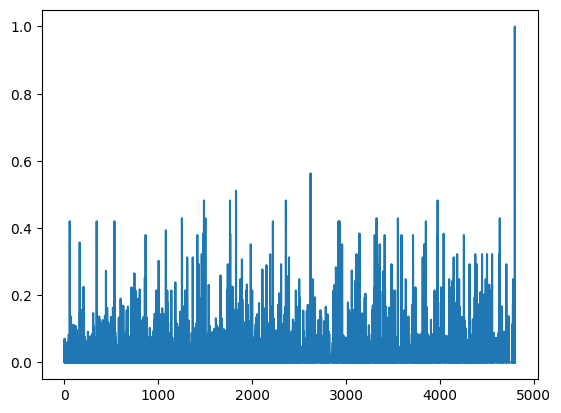

In [48]:
scores=cosine_similarity(X[MovieToIndex['El Mariachi']], X)
scores=scores.flatten()
plt.plot(scores)

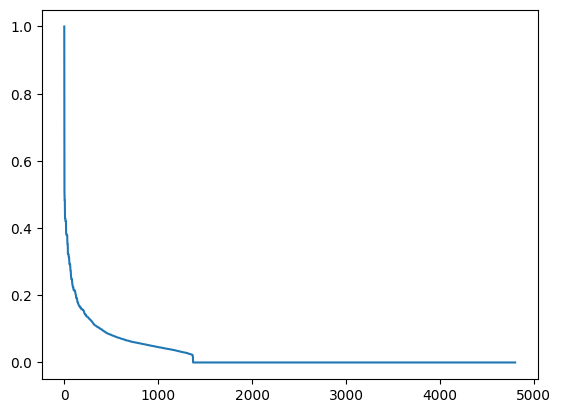

In [51]:
plt.plot(scores[(-scores).argsort()])

In [55]:
def Recommender(title, n):
    try:
        idx=MovieToIndex[title]
        scores=cosine_similarity(X[idx],X).flatten()
        recommendations=(-scores).argsort()[1:(n+1)]
        return Dataset['title'].iloc[recommendations]
    except:
        return []   

In [56]:
Recommender('El Mariachi', 6)

2623    The Three Burials of Melquiades Estrada
1829                     No Country for Old Men
3976                                Close Range
2360                                    Getaway
1765                            The Newton Boys
1488                                       Safe
Name: title, dtype: object